<a href="https://colab.research.google.com/github/sloverde/Polyethylene/blob/main/Polyethylene4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test notebook to run gromacs and perform a simulation of a polyethylene melt.  System setup was done using Charmm-gui.

https://www.charmm-gui.org/

If you wish to visualize the results of your simulations you will need to separately download and install VMD on your machine: https://www.ks.uiuc.edu/Development/Download/download.cgi?PackageName=VMD

First download gromacs which is open source molecular simulation software.

In [ ]:
# Download and unzip the compressed folder of GROMACS 2020.6 version
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
!tar xzf gromacs.tar.gz

--2022-10-28 17:30:44--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35608971 (34M) [application/octet-stream]
Saving to: ‘gromacs.tar.gz’

gromacs.tar.gz      100%[===================>]  33.96M  --.-KB/s    in 0.1s    

2022-10-28 17:30:44 (330 MB/s) - ‘gromacs.tar.gz’ saved [35608971/35608971]



In [ ]:
ls

gromacs/  gromacs.tar.gz  sample_data/


Clone Prof. Loverde's github repository with respective files.

In [ ]:
!git clone https://github.com/sloverde/Polyethylene.git

Cloning into 'Polyethylene'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 42 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [ ]:
ls

gromacs/  gromacs.tar.gz  Polyethylene/  sample_data/


Source Gromacs and make sure it runs.

In [ ]:
%%bash
source /content/gromacs/bin/GMXRC
gmx -h

SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (yes)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


                         :-) GROMACS - gmx, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
        M

In [ ]:
cd Polyethylene/


/content/Polyethylene


Set up the minimization files and next minimize.

In [ ]:
%%bash
source /content/gromacs/bin/GMXRC
gmx grompp -f step4.0_minimization.mdp -o step4.0_minimization.tpr -c step3_input.gro -r step3_input.gro -p topol.top -n index.ndx -maxwarn -1

turning H bonds into constraints...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 84x84x84, spacing 0.117 0.117 0.117
This run will generate roughly 6 Mb of data


                      :-) GROMACS - gmx grompp, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

In [ ]:
%%bash
source /content/gromacs/bin/GMXRC
gmx mdrun -v -deffnm step4.0_minimization

                      :-) GROMACS - gmx mdrun, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
      

In [ ]:
Set up equilibration files and next equilibrate.

In [ ]:
%%bash
source /content/gromacs/bin/GMXRC
gmx grompp -f step4.1_equilibration.mdp -o step4.1_equilibration.tpr -c step4.0_minimization.gro -r step3_input.gro -p topol.top -n index.ndx -maxwarn -1

turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 400 K
Calculated rlist for 1x1 atom pair-list as 1.200 nm, buffer size 0.000 nm
Set rlist, assuming 4x4 atom pair-list, to 1.200 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 84x84x84, spacing 0.117 0.117 0.117
This run will generate roughly 64 Mb of data


                      :-) GROMACS - gmx grompp, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

In [ ]:
%%bash
source /content/gromacs/bin/GMXRC
gmx mdrun -v -deffnm step4.1_equilibration

Process is terminated.


In [ ]:
ls

index.ndx        step4.0_minimization.gro   step5_1.gro           topol.top
README.md        step4.0_minimization.mdp   step5_1.xtc           toppar/
step3_input.gro  step4.1_equilibration.mdp  step5_production.mdp


In [ ]:
!pip install MDAnalysis
import MDAnalysis as mda


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 36.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.1 MB 51.7 MB/s 
     |████████████████████████████████| 376 kB 70.0 MB/s 
     |████████████████████████████████| 2.6 MB 56.8 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
  Created wheel for MDAnalysis: filename=MDAnalysis-2.1.0-cp37-cp37m-linux_x86_64.whl size=4649745 sha256=4e459c84d082fc413cd17e48f400377c3c0db404b610d3fe83aa5559d95342b9
  Stored in directory: /root/.cache/pip/wheels/fa/dd/6b/9d51e7216a401b71949467a123e3b2dffba11256346f7f7bda
Successfully built MDAnalysis


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
u = mda.Universe('step3_input.gro', 'step5_1.xtc')

In [ ]:
u.trajectory

<XTCReader step5_1.xtc with 11 frames of 79732 atoms>

In [ ]:
polymer1 = u.atoms[0:61]

In [ ]:
for ts in u.trajectory[1:11]:
    rad = polymer1.radius_of_gyration()
    print('frame={}: radgyr={}'.format(ts.frame, rad))

frame=1: radgyr=5.645861593919044
frame=2: radgyr=6.528878446957649
frame=3: radgyr=6.081913138493524
frame=4: radgyr=5.360171465189721
frame=5: radgyr=6.398609554414721
frame=6: radgyr=5.736803093499313
frame=7: radgyr=6.455351394738375
frame=8: radgyr=6.365853051189608
frame=9: radgyr=6.037873940452979
frame=10: radgyr=6.45614832529744


In [ ]:
!wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh 
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local 2>&1 1>/dev/null

In [ ]:
!conda install pandas

Solving environment: / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.5           |   py39h7deecbd_0         115 KB
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py39h06a4308_0         154 KB
    conda-22.9.0               |   py39h06a4308_0         884 KB
    intel-openmp-2021.4.0      |    h06a4308_3561         4.2 MB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1         474 KB
    libstdcxx-ng-11.2.0        |       h1234567_1         4.7 MB
    mkl-2021.4.0               |     h06a4308_640       142.6 MB
    mkl-service-2.4.0          |   py39h7f8727e_0  

In [ ]:
rgyr = []
time = []
polymer1 = u.atoms[0:61]
for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(polymer1.radius_of_gyration())

In [ ]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'


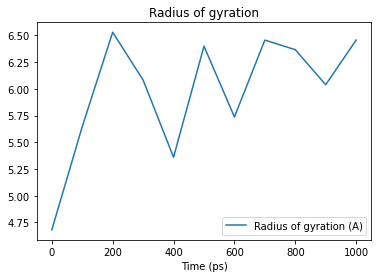

In [ ]:
%matplotlib inline

rgyr_df.plot(title='Radius of gyration')

Try averaging over all chains.

In [1]:
chains = u.atoms.fragments

NameError: ignored

Mean squared displacement.